In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
#The following imports are my own implementations of the Classification algorithms using Python and Numpy
from MLAlgorithms.Supervised.Classification.knnclassifier import *
from MLAlgorithms.Supervised.Classification.logisticregression import *

The data set of this project was downloaded from Kaggle website https://www.kaggle.com/competitions/titanic

### Titanic Disaster

### Description of the Data set:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others

Here is a description of the columns of the data set.
Survival column is  our response variable where 0 indicates that the passenger did not survive the accident and 1 means the passenger survived  it.

Let us read the data set using Pandas

In [2]:
titanic = pd.read_csv('titanic/train.csv')
response = titanic['Survived']

We can view the head of the data to see what the data attributes look like.

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let find out more about the data set

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are some missing values in the data set, we can find how the number of the missing value.

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Most of the missing values are in the Cabin column and Age column, and we have 2 missing values in Embarked. We can apply feature engineering to the categorical variables in the data. Drop columns that do not contribute to the survival rate of those on board

In [6]:
dropped_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [7]:
titanic.drop(dropped_cols, axis=1, inplace=True)

In [8]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


From the data info we can see that we only have some nan values in the Age column, we can handle the Nan values first. We can fill the missing age with the average age of the Age. It seems reasonable to fill the Age with the average of the people on board. We found tha average of the people on board is about 30 years.

In [9]:
av_age = titanic.Age.mean()
av_age

29.69911764705882

In [10]:
titanic['Age']  = titanic['Age'].fillna(int(np.round(av_age)))

There are some null  values in Embarked, we will replace  it with the max of the Embarked. We see that majority of the passengers comes from Southampton, so we fill the 2 missing values with S for Southampton.

In [11]:
titanic.groupby('Embarked').count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644


In [12]:
titanic['Embarked']  = titanic['Embarked'].fillna('S')

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


There is no longer any missing value in the data set we will be working with.

In [14]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic.groupby('Sex').count()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577


It seems that the values of both Age and Fare deviate way too much from the rest of the data, so scaling will be useful. Let us first apply the above feature engineering to our test data.

### Define hypothesis (Null and Alternative)

The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1..

### First Hypothesis

$ 𝐻_{0}: $ There is no difference between the survival of male and female.\
$ 𝐻_{A}: $ There is a difference between the survival of male and the female.

### Second Hypothesis

$ 𝐻_{0}: $ There survival depends on the age of the passenger.\
$ 𝐻_{A}: $ There is no relationship between the survival and age of those on board.

### Third Hypothesis

$ 𝐻_{0}: $ The survival depends on the socio-economic status of the passengers. First class passengers survived more than second and third class.\
$ 𝐻_{A}: $ There is no relationship between the survival and socio-economic status of those on board.

In [16]:
female=titanic.loc[titanic.Sex=="female"]
male=titanic.loc[titanic.Sex=="male"]

Let us Test the first hypothesis

In [17]:
survived_female = female.Survived
survived_male = male.Survived

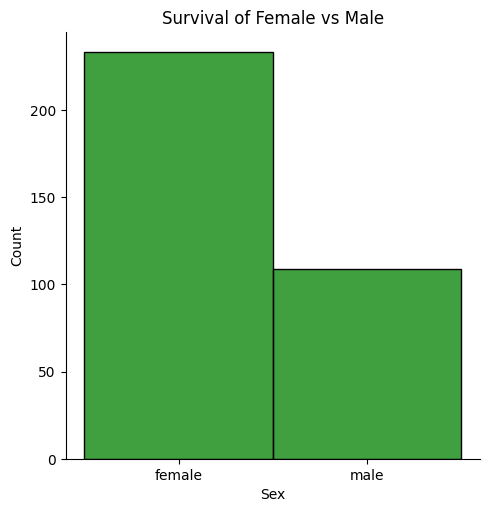

In [18]:
survived_group = titanic[titanic['Survived'] == 1]
sns.displot(survived_group.Sex,color='green')
plt.title('Survival of Female vs Male');

From the graph, we already see that the female actually survived more than male.

In [19]:
print('Female', survived_female.mean())
print('Male', survived_male.mean())

Female 0.7420382165605095
Male 0.18890814558058924


This means about 74% of female on board survived the incident while a handful of 19% of male survived.

### Formal Significance Test 

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.
We will Conduct a formal significance test for our first hypotheses and discuss the results

In [20]:
alpha=0.05
t_value, p_value = stats.ttest_ind(survived_female, survived_male)
print("t_value = ",t_value, ", p_value = ", p_value)

t_value =  19.297816550123354 , p_value =  1.4060661308802591e-69


In [21]:
if p_value <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value,alpha))
    print("Reject the null hypothesis that there is no difference between the survival of females and survival of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("Fail to reject the null hypothesis that there is a difference between the survival of females and survival of males.")

Conclusion: since p_value 1.4060661308802591e-69 is less than alpha 0.05 
Reject the null hypothesis that there is no difference between the survival of females and survival of males.


### Suggestions for next steps in analyzing this data

We do not have the full list of the data set, some data set was reserved so need to test our data more when we have additional data on Titanic.

### Summary

As only worked on a subset of Titanic data, we need more data to infer more quality insights. 

We will now further clean the data for machine learning. 

In [22]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
embarked_cat = titanic['Embarked'].unique().tolist()
embarked_cat

['S', 'C', 'Q']

In [24]:
parch_cat = titanic['Parch'].unique().tolist()
parch_cat

[0, 1, 2, 5, 3, 4, 6]

In [25]:
sibsp_cat = titanic['SibSp'].unique().tolist()
sibsp_cat

[1, 0, 3, 4, 2, 5, 8]

In [26]:
pclass_cat = titanic['Pclass'].unique().tolist()
pclass_cat

[3, 1, 2]

In [27]:
sex_cat = titanic['Sex'].unique().tolist()
sex_cat

['male', 'female']

In [28]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 0 if x=='female' else 1)

In [29]:
vars = ['Pclass', 'Parch', 'SibSp', 'Embarked']
titanic = pd.get_dummies(data=titanic, columns=vars, dtype=int)
titanic.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,7.2500,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,26.0,7.9250,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,35.0,8.0500,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [30]:
cor = titanic.corr().fillna(0)
cor

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.543351,-0.070657,0.257307,0.285904,0.093349,-0.322308,-0.147408,0.134174,0.075020,...,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292,-0.070234,0.168240,0.003650,-0.149683
Sex,-0.543351,1.000000,0.084660,-0.182333,-0.098013,-0.064746,0.137143,0.247523,-0.127636,-0.170993,...,0.203203,-0.179339,-0.042182,-0.094850,0.005735,0.023967,-0.014186,-0.082853,-0.074115,0.119224
Age,-0.070657,0.084660,1.000000,0.090632,0.319120,0.004949,-0.278983,0.262932,-0.149086,-0.256778,...,0.149308,0.013618,-0.087991,-0.123010,-0.250861,-0.113065,0.001651,0.032330,-0.010738,-0.021566
Fare,0.257307,-0.182333,0.090632,1.000000,0.591711,-0.118557,-0.413333,-0.237717,0.114650,0.203206,...,-0.192190,0.133121,0.070901,0.099936,-0.001008,0.022228,0.066913,0.269335,-0.117216,-0.162184
Pclass_1,0.285904,-0.098013,0.319120,0.591711,1.000000,-0.288585,-0.626738,-0.008373,0.018496,0.014713,...,-0.058470,0.125673,-0.026838,-0.017331,-0.081228,-0.042496,-0.050338,0.296423,-0.155342,-0.161921
Pclass_2,0.093349,-0.064746,0.004949,-0.118557,-0.288585,1.000000,-0.565210,-0.039091,0.062425,-0.005051,...,-0.033099,0.077469,0.035244,-0.048107,-0.073253,-0.038324,-0.045396,-0.125416,-0.127301,0.189980
Pclass_3,-0.322308,0.137143,-0.278983,-0.413333,-0.626738,-0.565210,1.000000,0.039029,-0.066741,-0.008566,...,0.077316,-0.171329,-0.005560,0.054084,0.129604,0.067804,0.080318,-0.153329,0.237449,-0.015104
Parch_0,-0.147408,0.247523,0.262932,-0.237717,-0.008373,-0.039091,0.039029,1.000000,-0.697070,-0.560350,...,0.420233,-0.223798,-0.080037,-0.201626,-0.256185,-0.134027,-0.158763,-0.032550,0.097467,-0.032821
Parch_1,0.134174,-0.127636,-0.149086,0.114650,0.018496,0.062425,-0.066741,-0.697070,1.000000,-0.122712,...,-0.302415,0.229119,0.062474,0.121701,0.155708,-0.029351,-0.034768,0.065610,-0.049463,-0.026350
Parch_2,0.075020,-0.170993,-0.256778,0.203206,0.014713,-0.005051,-0.008566,-0.560350,-0.122712,1.000000,...,-0.215801,0.002173,0.033439,0.164475,0.206045,0.239185,0.283327,-0.010882,-0.082626,0.061529


In [31]:
features = cor['Survived'].sort_values()
features

Sex          -0.543351
Pclass_3     -0.322308
Embarked_S   -0.149683
Parch_0      -0.147408
SibSp_0      -0.115867
Age          -0.070657
SibSp_8      -0.070234
SibSp_4      -0.064123
SibSp_5      -0.059292
Parch_4      -0.053002
SibSp_3      -0.037215
Parch_5      -0.028398
Parch_6      -0.026456
Embarked_Q    0.003650
SibSp_2       0.029796
Parch_3       0.033391
Parch_2       0.075020
Pclass_2      0.093349
Parch_1       0.134174
Embarked_C    0.168240
SibSp_1       0.173076
Fare          0.257307
Pclass_1      0.285904
Survived      1.000000
Name: Survived, dtype: float64

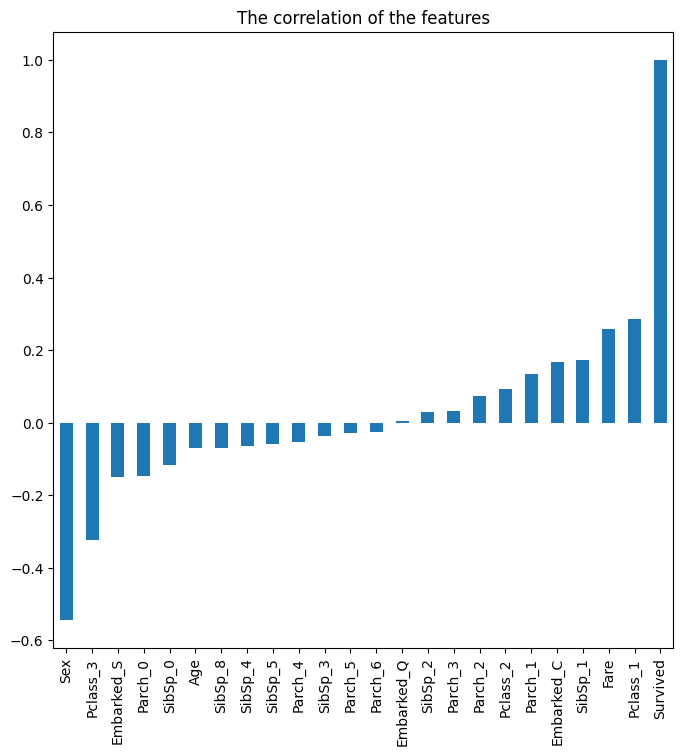

In [32]:
features.plot(kind='bar',figsize=(8,8))
plt.title('The correlation of the features');

<Axes: >

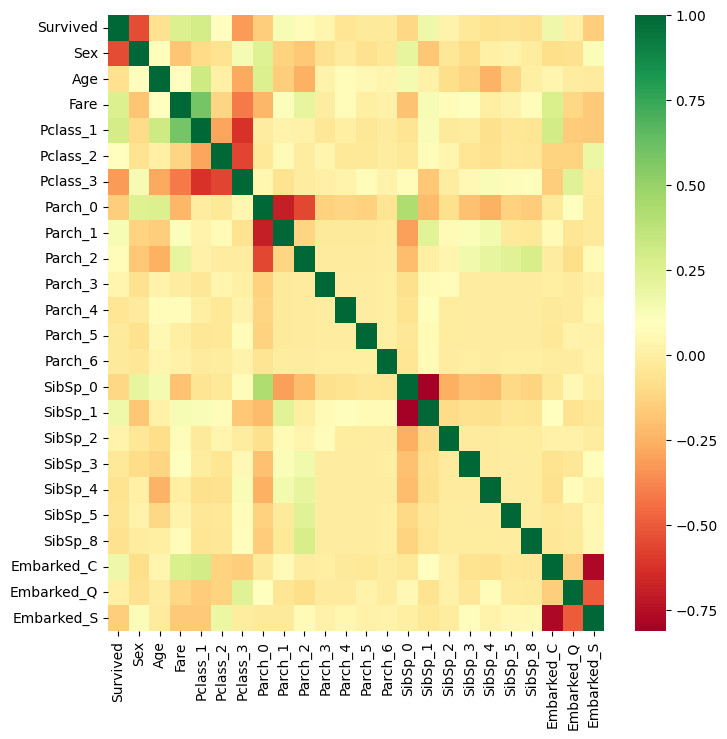

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=False,cmap='RdYlGn')

In [34]:
titanic.drop('Survived', axis=1, inplace=True)

In [35]:
titanic.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,...,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,7.2500,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,38.0,71.2833,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,26.0,7.9250,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,35.0,53.1000,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
y = np.array(response)

In [37]:
X_train = titanic.iloc[:600, :]
X_test = titanic.iloc[600:, :]
y_train = y[:600]
y_true = y[600:]
model = KNNClassifier(X_train, y_train, K=3)
#CV_n = model.loocv() #Apply Leave-Out-One Cross-Validation
#CV_n
predictions = model.predict(X_test)
#predictions, y_test = model.slice_cv(600)

In [38]:
model.accuracy(y_true)

70.44673539518901

In [39]:
count, values = model.error_count(y_true)
count

86

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_predictions
accuracy = (len(np.where(knn_predictions == y_true)[0]) / len(y_true))*100
print(accuracy)
error_count = len(np.where(knn_predictions != y_true)[0])
error_count

69.7594501718213


88